

<h2 id='part1'>A Look at the Data</h2>


First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import mok_py as t
%matplotlib inline

df20 = pd.read_csv('./2020_survey_results_public.csv')
df20.head()



,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:

no_nulls = set(df20.columns[df20.isnull().mean() > 0.4])#Provide a set of columns with 0 missing values.

print(df20.shape)
no_nulls

cols_unique = df20.nunique().sort_values(ascending=False)

larger_than = cols_unique[:]

#df20.drop(sub)
cols_unique.head(30)




(64461, 61)


Respondent                      64461
LanguageDesireNextYear          16243
LanguageWorkedWith              14256
DevType                          8269
PlatformDesireNextYear           7471
ConvertedComp                    6958
PlatformWorkedWith               6287
MiscTechDesireNextYear           5216
WebframeDesireNextYear           3986
WebframeWorkedWith               3789
DatabaseDesireNextYear           3193
CompTotal                        3003
DatabaseWorkedWith               2808
MiscTechWorkedWith               2730
NEWJobHunt                       2172
NEWCollabToolsDesireNextYear     1277
NEWCollabToolsWorkedWith         1153
NEWStuck                          444
JobFactors                        230
Ethnicity                         208
Country                           183
WorkWeekHrs                       157
CurrencyDesc                      142
CurrencySymbol                    141
Age                               110
NEWPurchaseResearch                63
NEWJobHuntRe

<h3 id='q1'>What are the top languages used by the surveyed people along with the desired to be learned next year</h3>



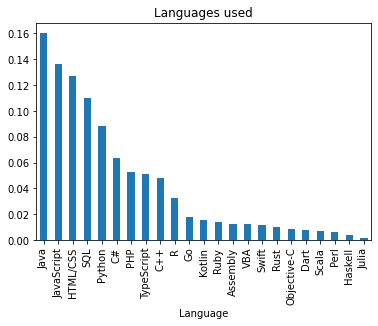

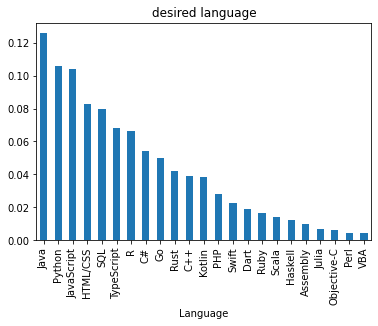

In [17]:
possible_language_vals = [ "Assembly", "Bash/Shell/PowerShell C", "C#", "C++", "Dart", "Go", "Haskell", "HTML/CSS", "Java", "JavaScript", "Julia", "Kotlin", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Rust", "Scala", "SQL", "Swift", "TypeScript", "VBA", "Other"]

def clean_and_plot(df, title='Languages used', plot=True, colName = 'LanguageWorkedWith'):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    language = df[colName].value_counts().reset_index()
    language.rename(columns={'index': 'Language', colName : 'count'}, inplace=True)
    language_df = t.total_count(language, 'Language', 'count', possible_language_vals)

    language_df.set_index('Language', inplace=True)
    if plot:
        (language_df/language_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_language_df = language_df/language_df.sum()

    return props_language_df


props_df = clean_and_plot(df20)

props_desired_df = clean_and_plot(df20, colName='LanguageDesireNextYear', title='desired language')






<h3 id='q1'>How the language used is compared to the ones desired next year? </h3>



In [ ]:
comp_df = pd.merge(props_df, props_desired_df, left_index=True, right_index=True)
comp_df.columns = ['langUsed_perc', 'langDesired_perc']
comp_df['Diff_lang_Vals'] =  comp_df['langDesired_perc'] - comp_df['langUsed_perc']
comp_df.sort_values

comp_df = comp_df.iloc[comp_df.langDesired_perc.argsort()[::-1]]

comp_df.style.bar(subset=['Diff_lang_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


<h3 id='q1'>Looking at the data for languages used and desired, is it different between developers by profession and others? </h3>



In [ ]:

prof = df20[df20['MainBranch'] == "I am a developer by profession"] # Subset df to only to developer by profession  
notProf = df20[df20['MainBranch'] != "I am a developer by profession"] # Subset df to other than developer by proession



langUsed_prof_perc = clean_and_plot(prof, 'Developer by profession', plot=False)
langUsed_notProf_perc = clean_and_plot(notProf, 'Not prof', plot=False)


comp_df = pd.merge(langUsed_prof_perc, langUsed_notProf_perc, left_index=True, right_index=True)
comp_df.columns = ['langUsed_prof_perc', 'langUsed_notProf_perc']
comp_df['Diff_langUsed_Vals'] = comp_df['langUsed_prof_perc'] - comp_df['langUsed_notProf_perc']
comp_df.style.bar(subset=['Diff_langUsed_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])






In [ ]:
#Desired Language

desiredLang_prof_perc = clean_and_plot(prof, 'Developer by profession', plot=False, colName='LanguageDesireNextYear')
desiredLang_notProf_perc = clean_and_plot(notProf, 'Not prof', plot=False, colName='LanguageDesireNextYear')

comp_df = pd.merge(desiredLang_prof_perc, desiredLang_notProf_perc, left_index=True, right_index=True)
comp_df.columns = ['desiredLang_prof_perc', 'desiredLang_notProf_perc']
comp_df['Diff_desiredLang_Vals'] = comp_df['desiredLang_prof_perc'] - comp_df['desiredLang_notProf_perc']
comp_df.style.bar(subset=['Diff_desiredLang_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


<h3 id='q1'>How job seeking is compared across different segmentation?</h3>





In [3]:

def jobSeekValue(jobSeek_str):
    '''
    INPUT
        jobSeek_str - a string for the job seek string
    OUTPUT
        return 2 if "I am actively looking for a job"
        return 1 if "I’m not actively looking, but I am open to new opportunities"
        return 0 if "I am not interested in new job opportunities"
    
    '''
    if jobSeek_str == "I am actively looking for a job":    
        return 2
    elif jobSeek_str == "I’m not actively looking, but I am open to new opportunities": 
        return 0.5
    elif jobSeek_str == "I am not interested in new job opportunities": 
        return 0

df20['jobSeekValue'] = df20["JobSeek"].apply(jobSeekValue)

print(df20.groupby(['JobSat']).mean()['jobSeekValue'].sort_values(ascending=False))
print()
print(df20.groupby(['UndergradMajor']).mean()['jobSeekValue'].sort_values(ascending=False))


JobSat
Slightly dissatisfied                 0.857090
Very dissatisfied                     0.849971
Neither satisfied nor dissatisfied    0.748654
Slightly satisfied                    0.542743
Very satisfied                        0.305908
Name: jobSeekValue, dtype: float64

UndergradMajor
Web development or web design                                                     0.722368
Information systems, information technology, or system administration             0.674192
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.645798
A social science (such as anthropology, psychology, political science, etc.)      0.643204
Computer science, computer engineering, or software engineering                   0.638461
A business discipline (such as accounting, finance, marketing, etc.)              0.619007
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.608833
A health science (such as nursing, pharmacy, radiology, etc.)         

<h3 id='q1'>Aside from compnensation, benefits and location, what factors are important when looking for a job?</h3>


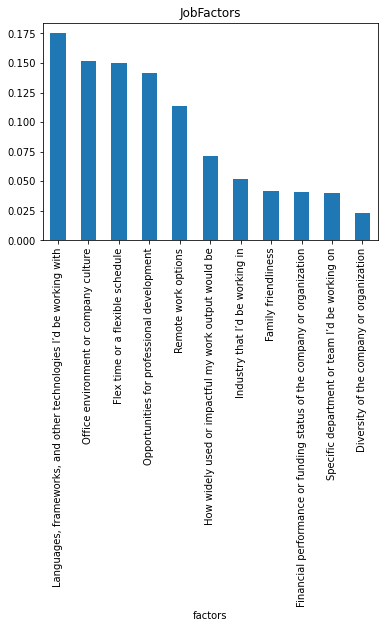

In [5]:
possible_factor_vals = [ "Remote work options", 
"Office environment or company culture", 
"Financial performance or funding status of the company or organization", 
"Opportunities for professional development", 
"Diversity of the company or organization",
"How widely used or impactful my work output would be", 
"Industry that I’d be working in", 
"Specific department or team I’d be working on", 
"Flex time or a flexible schedule", 
"Languages, frameworks, and other technologies I’d be working with", 
"Family friendliness"]

def clean_and_plot_factors(df, title='JobFactors', plot=True, colName = 'JobFactors'):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    factors = df[colName].value_counts().reset_index()
    factors.rename(columns={'index': 'factors', colName : 'count'}, inplace=True)
    factors_df = t.total_count(factors, 'factors', 'count', possible_factor_vals)

    factors_df.set_index('factors', inplace=True)
    if plot:
        (factors_df/factors_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_factors_df = factors_df/factors_df.sum()
    return props_factors_df


props_factorsssss_df = clean_and_plot_factors(df20)

In [10]:
def clean_data(df):
    
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no job seek value
    2. Create X as all the columns that are not the job seek column column
    3. Create y as the job seek column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing values
    # Select only columns, where there is no much vriation in results
    df = df[['MainBranch', 'Hobbyist', 'Age', 'CompFreq', 'Country', 'ConvertedComp', 'CurrencyDesc', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',  'JobSat', 'NEWJobHunt', 'NEWJobHuntResearch', 'OpSys', 'OrgSize', 'Sexuality', 'Trans', 'UndergradMajor', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro', 'jobSeekValue']]

    df = df.dropna(subset=['jobSeekValue'], axis=0)
    y = df['jobSeekValue']
    
    #Drop respondent and expected salary columns
    df = df.drop(['jobSeekValue'], axis=1)
   
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df20) 
print(X.shape)

(51727, 10821)
         Age  ConvertedComp  WorkWeekHrs  \
0  30.818293  103779.935224    50.000000   
1  30.818293  103779.935224    40.778412   
3  25.000000  103779.935224    40.000000   
5  30.818293  103779.935224    40.778412   
6  30.818293  103779.935224    40.778412   

   MainBranch_I am a student who is learning to code  \
0                                                  0   
1                                                  0   
3                                                  0   
5                                                  0   
6                                                  0   

   MainBranch_I am not primarily a developer, but I write code sometimes as part of my work  \
0                                                  0                                          
1                                                  0                                          
3                                                  0                                          
5  

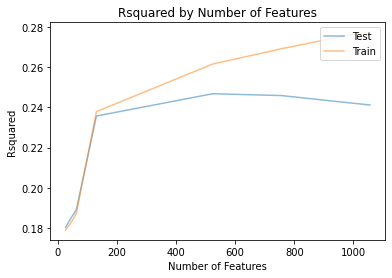

In [11]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [12]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

524
0.24679930752001789
0.26155459642447976


In [13]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
170,"Employment_Not employed, but looking for work",0.803786,0.803786
287,JobSat_Very satisfied,-0.382253,0.382253
76,CurrencyDesc_Chinese Yuan Renminbi,-0.336980,0.336980
74,CurrencyDesc_Canadian dollar,-0.307050,0.307050
106,CurrencyDesc_Swedish krona,-0.306989,0.306989
90,CurrencyDesc_Mexican peso,-0.304842,0.304842
92,CurrencyDesc_New Zealand dollar,-0.280156,0.280156
94,CurrencyDesc_Norwegian krone,-0.264765,0.264765
361,NEWJobHunt_Wanting to share accomplishments wi...,0.253167,0.253167
68,Country_Viet Nam,0.238614,0.238614
